In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.preprocessing import image
from keras.layers import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_path ='/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
val_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'


In [10]:
img_classes = os.listdir(train_path)

img_classes[0]

'Broccoli'

In [12]:
img_fol_path = train_path + '/' + 'Broccoli'
img_in_folder = os.listdir(img_fol_path)
img_in_folder[0]

'0664.jpg'

In [16]:
def plot_classes(img_classes,path_):
    plt.figure(figsize = (12,12))
    
    for i , cat in enumerate(img_classes):
        img_fol_path = path_ + '/' + cat
        img_in_folder = os.listdir(img_fol_path)
    
        first_img = img_in_folder[0]
        first_img_path = img_fol_path + '/' +  first_img
    
        img_ = image.load_img(first_img_path)
        img_array = image.img_to_array(img_) /255
    
    
        plt.subplot(4,4,i+1)
        plt.imshow(img_array)
        plt.title(cat)
        plt.axis('off')
    plt.show()

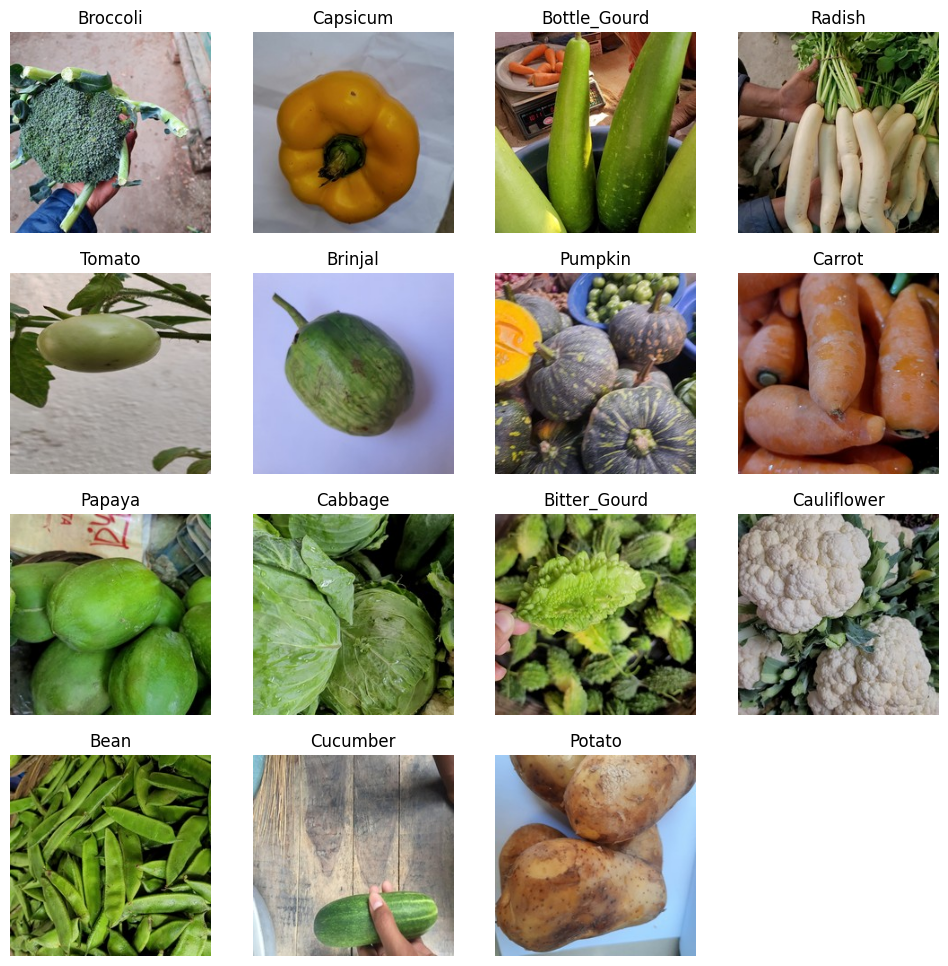

In [17]:
plot_classes(img_classes,test_path)

In [18]:
#image pre
data_gen = ImageDataGenerator(rescale = 1/255)

In [19]:
train_data = data_gen.flow_from_directory(train_path,
                                         target_size = (150,150),
                                         class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [20]:
test_data = data_gen.flow_from_directory(test_path,
                                         target_size = (150,150),
                                         class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [21]:
val_data = data_gen.flow_from_directory(val_path,
                                         target_size = (150,150),
                                         class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [22]:
## Build --> CNN
cnn_model = Sequential()

####### Conv layer -------------------------------
cnn_model.add(Conv2D(filters= 64 , kernel_size = 3,activation = 'relu', input_shape =[150,150,3] ))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Conv2D(filters= 32 , kernel_size = 3,activation = 'relu' ))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())


####### NN ---------------------
#hidden
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

# output layer

cnn_model.add(Dense(15, activation = 'softmax'))

In [23]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,347,247 (20.40 MB)

 Trainable params: 5,347,247 (20.40 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cnn_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [30]:
model_history = cnn_model.fit(train_data, epochs = 5, validation_data =val_data )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9563 - loss: 0.1337 - val_accuracy: 0.9007 - val_loss: 0.3444
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.9795 - loss: 0.0681 - val_accuracy: 0.9203 - val_loss: 0.2767
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.8960 - val_loss: 0.4216
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.8957 - val_loss: 0.4098
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9824 - loss: 0.0554 - val_accuracy: 0.8933 - val_loss: 0.5196


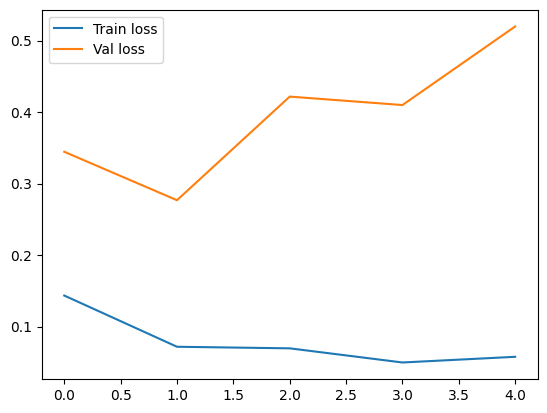

In [31]:
plt.plot(model_history.history['loss'], label = 'Train loss')
plt.plot(model_history.history['val_loss'], label = 'Val loss')
plt.legend()
plt.show()

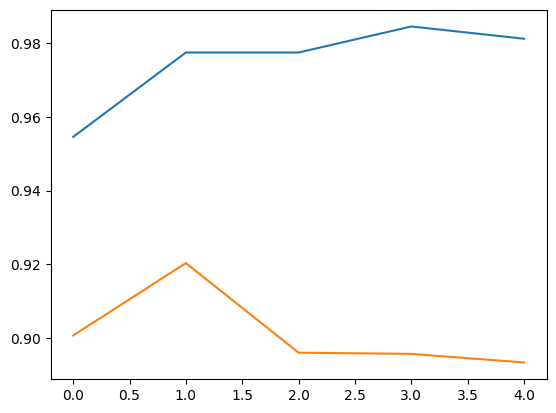

In [32]:
plt.plot(model_history.history['accuracy'], label = 'Train accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Val accuracy')

In [34]:
cnn_model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - accuracy: 0.8937 - loss: 0.5053


[0.49618589878082275, 0.8920000195503235]

In [35]:
cnn_model.save('veg_model.h5')